# Inferential Statistics

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# use credit card fraud dataset
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/credit_card_fraud.csv'

### Read the credit card fraud dataset into a Pandas data frame.

In [ ]:
data = pd.read_csv(data_url)
data.head()

,transaction,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,DEBIT,7414.00,C446504763,151707.00,144293.00,C1854925027,39000000.0,39900000.0,0
1,2,DEBIT,2899.20,C757752441,0.00,0.00,C1854925027,39000000.0,39000000.0,0
2,3,CASH_OUT,17447.35,C1004533006,0.00,0.00,C1620573488,34400000.0,35000000.0,0
3,4,CASH_OUT,477.53,C23579491,0.00,0.00,C356023140,33800000.0,33800000.0,0
4,5,CASH_IN,18184.97,C861745646,6101058.91,6119243.88,C356023140,33800000.0,33800000.0,0


### Generate a histogram that shows the data distribution of the "amount" field in the data.

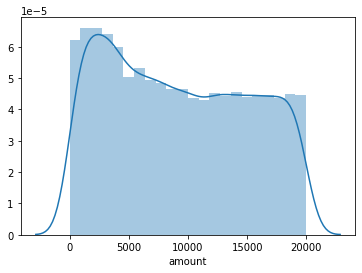

In [ ]:
sns.distplot(data["amount"])

### Randomly sample with replacement 1,000 records from the data set and calculate the mean of the "amount" field.

Run the cell a few times and see how the mean changes based on the records that are sampled.

In [ ]:
amount_mean = [data.sample(len(data), replace = True)['amount'].mean() for i in range(1000)]

def Average(lst): 
    return sum(lst) / len(lst) 

average = Average(amount_mean)     
average

9240.676301045896

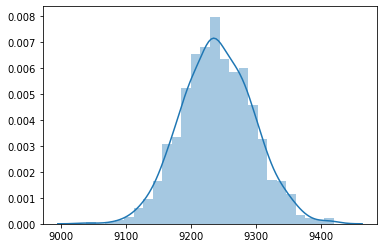

In [ ]:
sns.distplot(amount_mean)

### Bootstrap a sampling distribution for the "amount" field means and generate a histogram showing the distribution of values.

- Generate one sampling distribution using 1,000 samples of size 1,000.
- Generate another sampling distribution using 5,000 samples that are each the size of the original data set.
- Note the differences between the two sampling distributions.

In [ ]:
amount_mean = [data.sample(len(data), replace = True)['amount'].mean() for i in range(1000)]

def Average(lst): 
    return sum(lst) / len(lst) 

average = Average(amount_mean)     
average



9238.354081167974

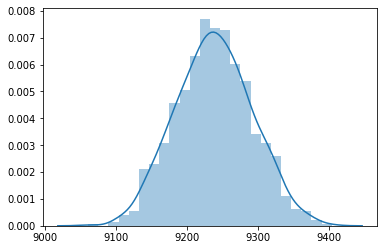

In [ ]:
sns.distplot(amount_mean)

### Use Bayesian inference to construct a model that generates the posterior distribution showing the likely range of credit card fraud rates that may have resulted in the observed amount of fraud we see in the data. Hint: You'll want to look at the "isFraud" and "transaction" fields to help you.

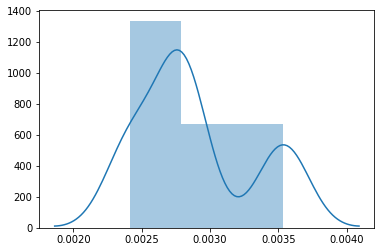

In [ ]:
observed = data[data["isFraud"] == 1]['transaction'].values[0]
transactions = len(data)
observed_fraud = observed / transactions

results = []

for i in range(100000):
  param = np.random.random()
  result = np.random.binomial(transactions, param)

  if result == observed:
    results.append(param)

sns.distplot(results)    